In [ ]:
!pip install gdown

In [ ]:
!gdown https://drive.google.com/uc?id=184S66ZReT_6WufPW3z72LSfmnNk-BQEn&export=download

Downloading...
From: https://drive.google.com/uc?id=184S66ZReT_6WufPW3z72LSfmnNk-BQEn
To: /content/class_identity.txt
100% 3.42M/3.42M [00:00<00:00, 179MB/s]


In [ ]:
!gdown https://drive.google.com/drive/folders/0B_lXDfFnXSzFd3Z5TDZoRFZvQUk?resourcekey=0-pSXSzleEzmPm3iNtg5LoaA&usp=sharing

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:44: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/folders/0B_lXDfFnXSzFd3Z5TDZoRFZvQUk?resourcekey=0-pSXSzleEzmPm3iNtg5LoaA
To: /content/gdrive/MyDrive/Colab Notebooks/Face Recognition/0B_lXDfFnXSzFd3Z5TDZoRFZvQUk?resourcekey=0-pSXSzleEzmPm3iNtg5LoaA
1.09MB [00:00, 253MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd 'gdrive/MyDrive/Colab Notebooks/Face Recognition/'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/Face Recognition


In [ ]:
!pwd

/content/gdrive/My Drive/Colab Notebooks/Face Recognition


In [ ]:
!unzip Dataset-20240304T150904Z-001.zip


# **DATASET PREPARATION**



Lets examine "gender_classification.csv"  file. It is contain binary 0 & 1 with header "Male". Our assumption, the file might be the label

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from sklearn.model_selection import train_test_split
import shutil

In [ ]:
df_gender = pd.read_csv('Dataset/gender_classification.csv')
df_gender.head()
df_gender.iloc[50:51,[0]]
df_gender.shape


(5000, 1)

In [ ]:
df_gender.describe()

,Male
count,5000.000000
mean,0.409400
std,0.491772
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Male    5000 non-null   int64
dtypes: int64(1)
memory usage: 39.2 KB


In [ ]:
df_gender.groupby(['Male'])['Male'].count()

Male
0    2953
1    2047
Name: Male, dtype: int64

In [ ]:
df_gender['Male'].value_counts(normalize=True) * 100

0    59.06
1    40.94
Name: Male, dtype: float64

Load the image filename

In [ ]:
fn = os.listdir('Dataset/Images/')
fn.sort()
len(fn)
fn[0:5]

['000051.jpg', '000052.jpg', '000065.jpg', '000166.jpg', '000198.jpg']

In [ ]:
df_gender.head()

,Male
0,1
1,1
2,1
3,0
4,0


We need to check wether the "gender_classification.csv" is actually the label by join it with the image files. Sampling 6 images from top and check it with the label in  "gender_classification.csv".

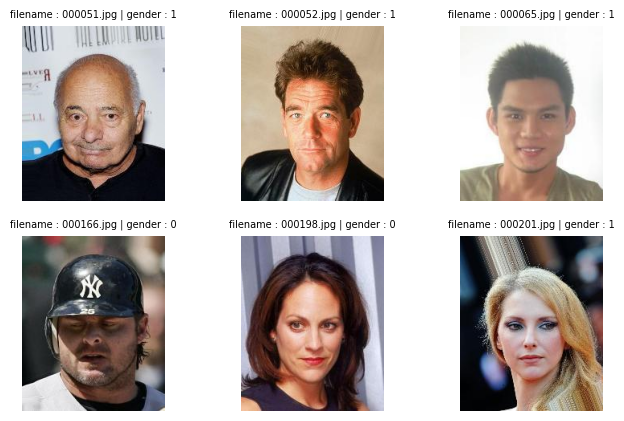

In [ ]:
list_img = []
x = 0
fig = plt.figure(figsize = (8,5))
for gender in df_gender['Male'].head(6) :
  img_path = f'Dataset/Images/{fn[x]}'
  img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
  img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
  fig.add_subplot(2,3,x+1)
  plt.title(f'filename : {fn[x]} | gender : {gender}', fontsize = 7)
  plt.axis('off')
  plt.imshow(img)
  #print(gender)
  #x_fn = f'Dataset/Images/{x:06d}.jpg'
  #print(x_fn)
  x += 1

Take a look for filename 000166.jpg. The label "gender : 0" is actually wrong. It should be man ("1"). Hence, we cannot use "gender_classification.csv" as the label.

In [ ]:
import glob
img_fn = glob.glob('Dataset/Images/??????.jpg')
len(img_fn)

5000

Let's check another file to use as a label. Which is "list_attribute.txt"

In [ ]:
df_atr = pd.read_csv('Dataset/list_attribute.txt', sep=' ')
df_atr.head()
df_atr.shape


ParserError: Error tokenizing data. C error: Expected 41 fields in line 3, saw 54


The "list_attribute.txt" cannot loaded using pandas with separator ' '. Hence, file needs to be cleaned. Let's load it manually using open.

In [ ]:
## print 4 lines
f = open('Dataset/list_attribute.txt')
attr = f.readlines()
for line in attr[0:4] :
  print(line)

202599

5_o_Clock_Shadow Arched_Eyebrows Attractive Bags_Under_Eyes Bald Bangs Big_Lips Big_Nose Black_Hair Blond_Hair Blurry Brown_Hair Bushy_Eyebrows Chubby Double_Chin Eyeglasses Goatee Gray_Hair Heavy_Makeup High_Cheekbones Male Mouth_Slightly_Open Mustache Narrow_Eyes No_Beard Oval_Face Pale_Skin Pointy_Nose Receding_Hairline Rosy_Cheeks Sideburns Smiling Straight_Hair Wavy_Hair Wearing_Earrings Wearing_Hat Wearing_Lipstick Wearing_Necklace Wearing_Necktie Young 

000001.jpg -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1  1 -1 -1  1

000002.jpg -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1



Line 1 is actually some number with 1 column. <br>
Line 2 is the header <br>
Line 3 is startting the actual data <br>
<br>
Let's check the number of field for header and the data

In [ ]:
print(f'Header length : {len(attr[1].split())}')
print(f'Data length : {len(attr[2].split())}')

Header length : 40
Data length : 41


Let's check why the header and data is different in length

In [ ]:
## Print header
print("Header : ")
print(attr[1].split())
## Print data
print("Data :")
print(attr[2].split())
print('-' * 50)

## Print first column header
print(f'header 1st column : {attr[1].split()[0]}')
## Print first column data
print(f'data 1st column : {attr[2].split()[0]}')

Header : 
['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']
Data :
['000001.jpg', '-1', '1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '1', '-1', '1', '-1', '-1', '1', '-1', '-1', '1', '-1', '-1', '-1', '1', '1', '-1', '1', '-1', '1', '-1', '-1', '1']
--------------------------------------------------
header 1st column : 5_o_Clock_Shadow
data 1st column : 000001.jpg


Header and Data is not sync. Header 1st column should be Filenames. We have to add "Filenames" as the first column header

In [ ]:
## Create list of attributes to contain the column and data
np_header = np.array(attr[1].split())
np_header = np.hstack((np.array(['Filenames']), np_header))
print(np_header.shape)
print(np_header[:])

(41,)
['Filenames' '5_o_Clock_Shadow' 'Arched_Eyebrows' 'Attractive'
 'Bags_Under_Eyes' 'Bald' 'Bangs' 'Big_Lips' 'Big_Nose' 'Black_Hair'
 'Blond_Hair' 'Blurry' 'Brown_Hair' 'Bushy_Eyebrows' 'Chubby'
 'Double_Chin' 'Eyeglasses' 'Goatee' 'Gray_Hair' 'Heavy_Makeup'
 'High_Cheekbones' 'Male' 'Mouth_Slightly_Open' 'Mustache' 'Narrow_Eyes'
 'No_Beard' 'Oval_Face' 'Pale_Skin' 'Pointy_Nose' 'Receding_Hairline'
 'Rosy_Cheeks' 'Sideburns' 'Smiling' 'Straight_Hair' 'Wavy_Hair'
 'Wearing_Earrings' 'Wearing_Hat' 'Wearing_Lipstick' 'Wearing_Necklace'
 'Wearing_Necktie' 'Young']


Combine header and the data filenames into pandas

In [ ]:
## Split strings data into column and make it numpy array
np_data = np.array([x.split() for x in attr[2:]])
np_data.shape
#len(arr)

(202599, 41)

In [ ]:
np_data[0:2]

array([['000001.jpg', '-1', '1', '1', '-1', '-1', '-1', '-1', '-1', '-1',
        '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '1',
        '-1', '1', '-1', '-1', '1', '-1', '-1', '1', '-1', '-1', '-1',
        '1', '1', '-1', '1', '-1', '1', '-1', '-1', '1'],
       ['000002.jpg', '-1', '-1', '-1', '1', '-1', '-1', '-1', '1', '-1',
        '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1',
        '-1', '1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1',
        '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1']], dtype='<U10')

In [ ]:
## Find the Male index
idx_gender = np.where(np_header == "Male")[0][0]
print(f"column header {np_header[[0, idx_gender]]}")
print(f"column data {np_data[0, [0, idx_gender]]}")

column header ['Filenames' 'Male']
column data ['000001.jpg' '-1']


In [ ]:
## Create dataframe by combining header and data
df_data = pd.DataFrame(data = np_data[0:, [0, idx_gender]], columns = np_header[[0, idx_gender]])

In [ ]:
df_data.loc[0:2, ["Filenames", "Male"]]

,Filenames,Male
0,000001.jpg,-1
1,000002.jpg,-1
2,000003.jpg,1


Find the data having actual image files

In [ ]:
## listing filenames in folder
img_fn = sorted([ os.path.basename(x) for x in glob.glob('Dataset/Images/*.jpg') ])
img_fn[0:2]

['000051.jpg', '000052.jpg']

In [ ]:
## find data having actual image files
df_exist = df_data[df_data['Filenames'].isin(img_fn)]

#replace -1 value in label with 0.
df_exist['Male'].replace(to_replace = '-1', value = 0, inplace=True)
df_exist['Male'] = pd.to_numeric(df_exist['Male'])

<ipython-input-140-35fbb47307fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exist['Male'].replace(to_replace = '-1', value = 0, inplace=True)
<ipython-input-140-35fbb47307fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exist['Male'] = pd.to_numeric(df_exist['Male'])


Let's save it for check point

In [ ]:
df_exist.reset_index(drop=True, inplace=True)
df_exist.to_csv('Dataset/list_male_clean.csv', index=False)

Let's sampling the image based on label

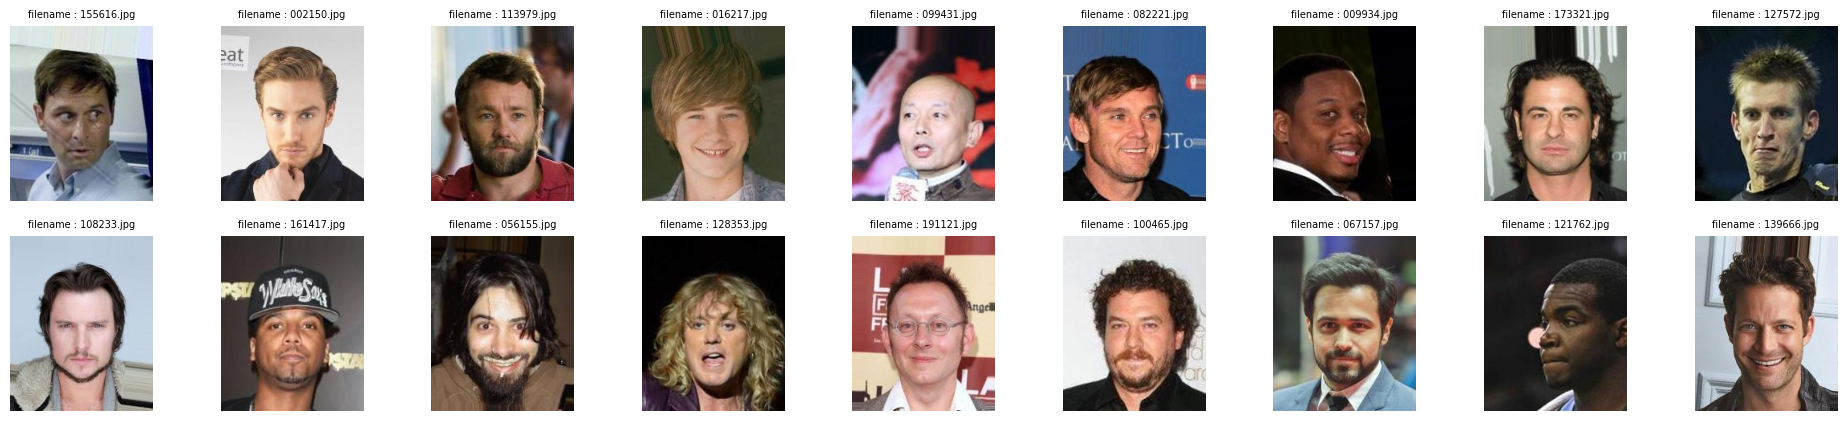

In [ ]:
## Sampling random check for male images
x=0
fig = plt.figure(figsize = (24,5))
for idx, row in df_exist.loc[df_exist['Male'] == 1, ['Filenames']].sample(n=18).iterrows() :
  f = row[0]
  img_path = f'Dataset/Images/{f}'
  img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
  img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
  fig.add_subplot(2,9,x+1)
  plt.title(f'filename : {f}', fontsize = 7)
  plt.axis('off')
  plt.imshow(img)
  x += 1

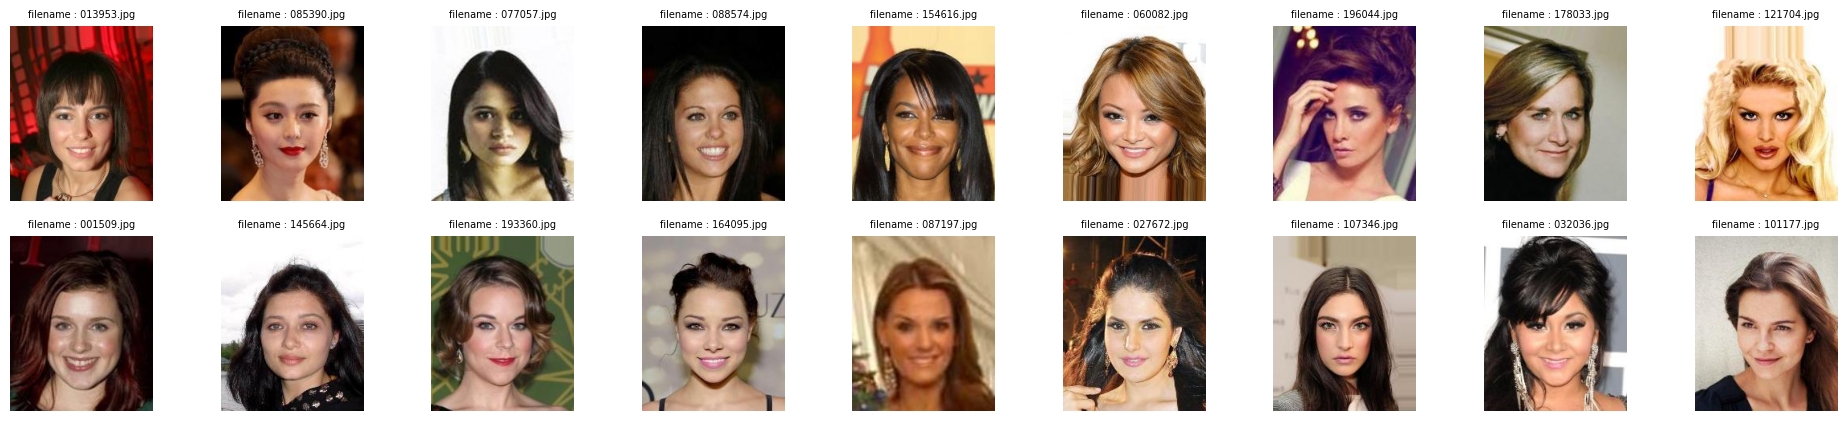

In [ ]:
## Sampling random check for women images
x=0
fig = plt.figure(figsize = (24,5))
for idx, row in df_exist.loc[df_exist['Male'] == 0, ['Filenames']].sample(n=18).iterrows() :
  f = row[0]
  img_path = f'Dataset/Images/{f}'
  img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
  img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
  fig.add_subplot(2,9,x+1)
  plt.title(f'filename : {f}', fontsize = 7)
  plt.axis('off')
  plt.imshow(img)
  x += 1

In [ ]:
print(f"Total Women : {df_exist['Male'].value_counts()[0]}")
print(f"Total Man : {df_exist['Male'].value_counts()[1]}")

Total Women : 2953
Total Man : 2047


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_exist, test_size=0.2)

In [ ]:
print(f"Total Women train : {train['Male'].value_counts()[0]}")
print(f"Total Man train : {train['Male'].value_counts()[1]}")

Total Women : 2369
Total Man : 1631


In [ ]:
print(f"Total Women test : {test['Male'].value_counts()[0]}")
print(f"Total Man test : {test['Male'].value_counts()[1]}")

Total Women test : 584
Total Man test : 416


In [ ]:
train.head()

,Filenames,Male
2462,098446.jpg,0
4669,189077.jpg,0
3478,140986.jpg,0
967,038818.jpg,1
2598,104595.jpg,1


Save image for train and test/validation to different directory

In [ ]:
!mkdir 'Dataset/train'
!mkdir 'Dataset/test'

In [ ]:
for idx, row in test[['Filenames']].iterrows() :
  f = row[0]
  img_path = f'Dataset/Images/{f}'
  shutil.copy(img_path, 'Dataset/test' )

In [ ]:
for idx, row in train[['Filenames']].iterrows() :
  f = row[0]
  img_path = f'Dataset/Images/{f}'
  shutil.copy(img_path, 'Dataset/train' )

Save the clean attribute for each train and test validation

In [ ]:
train.to_csv('Dataset/list_train_clean.csv', index=False)

In [ ]:
test.to_csv('Dataset/list_test_clean.csv', index=False)